In [1]:
using LowRankModels
using PyPlot

INFO: Loading help data...


In [7]:
## Generate synthetic data from true factorization A = x_*y_
m = 80; n = 50; k = 4

x_ = zeros(m,k)
for i = 1:m
    x_[i,rand(1:k)] = 1.0  # each row of x_ is unit-one-sparse
end
y_ = rand(-1:2:1,(n,k))'   # binary data 
A = x_ * y_;

In [8]:
function run_fit(loss_function)
    losses = fill(loss_function,n)
    rx = nonneg_onereg()
    ry = zeroreg()
    glrm = GLRM(A,losses,rx,ry,k)
    X,Y,ch = fit!(glrm,verbose=false)
    println("Final Objective: ",ch.objective[end])
    return X,Y,ch
end

function run_batch(loss_function;N=20)
    best = Inf
    X,Y,ch = 0,0,0
    for i = 1:N
        Xest,Yest,ch_ = run_fit(loss_function)
        if ch_.objective[end] < best
            best = ch_.objective[end]
            X,Y,ch = Xest,Yest,ch_
        end
    end
    println("Best Objective: ",ch.objective[end])
    return X,Y,ch
end

run_batch (generic function with 1 method)

In [9]:
Xlog,Ylog,ch_log = run_batch(logistic());
println("----------")
Xquad,Yquad,ch_quad = run_batch(quadratic());

Final Objective: 3827.4787126800506
Final Objective: 4113.469306030129
Final Objective: 3787.2086767798037
Final Objective: 3698.332922091171
Final Objective: 3989.349468619217
Final Objective: 3640.6280652577702
Final Objective: 3514.217960502234
Final Objective: 3477.4177098121545
Final Objective: 3464.265509250083
Final Objective: 3477.975566914309
Final Objective: 3746.658532517017
Final Objective: 3570.7699604718414
Final Objective: 3689.719937782878
Final Objective: 3803.0158523317496
Final Objective: 3509.930594600743
Final Objective: 3571.9690692454633
Final Objective: 3877.394417358484
Final Objective: 4060.972076718711
Final Objective: 3966.8596357218794
Final Objective: 3924.8033909522355
Best Objective: 3464.265509250083
----------
Final Objective: 61.557129159930284
Final Objective: 771.1374771202128
Final Objective: 70.70361619527965
Final Objective: 62.93851620916518
Final Objective: 83.0021670291837
Final Objective: 166.41109500220006
Final Objective: 63.878814749433765

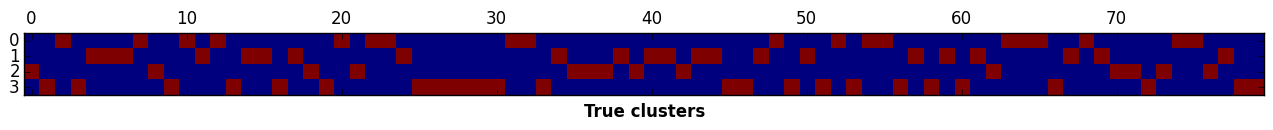

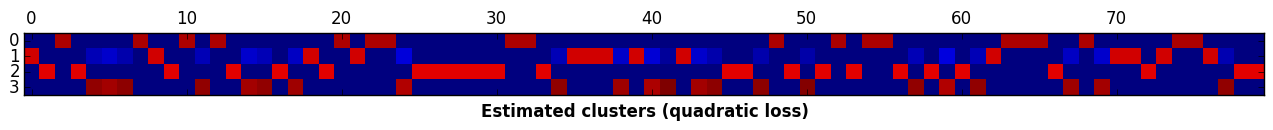

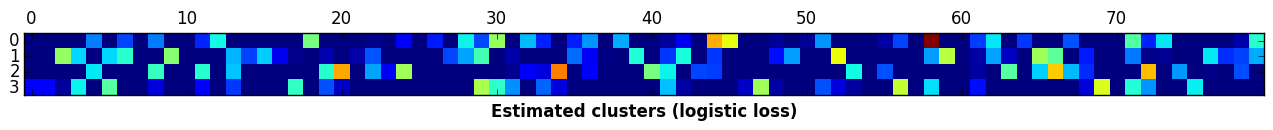

PyObject <matplotlib.text.Text object at 0x7f1eea0c9690>

In [10]:
matshow(x_')
xlabel("True clusters",fontweight="bold")

matshow(Xquad')
xlabel("Estimated clusters (quadratic loss)",fontweight="bold")

matshow(Xlog')
xlabel("Estimated clusters (logistic loss)",fontweight="bold")

In [11]:
Xquad

80x4 Array{Float64,2}:
 0.0       0.727338   0.0       0.0     
 0.0       0.0        0.712687  0.0     
 0.749853  0.0        0.0       0.0     
 0.0       0.0        0.712733  0.0     
 0.0       0.0395533  0.0       0.767565
 0.0       0.0524426  0.0       0.757188
 0.0       0.0328391  0.0       0.77297 
 0.749853  0.0        0.0       0.0     
 0.0       0.727338   0.0       0.0     
 0.0       0.0        0.712556  0.0     
 0.749853  0.0        0.0       0.0     
 0.0       0.0391217  0.0       0.767912
 0.749853  0.0        0.0       0.0     
 ⋮                                      
 0.749853  0.0        0.0       0.0     
 0.0       0.0543259  0.0       0.755672
 0.0       0.727338   0.0       0.0     
 0.0       0.727338   0.0       0.0     
 0.0       0.0        0.712695  0.0     
 0.0       0.727338   0.0       0.0     
 0.749853  0.0        0.0       0.0     
 0.749853  0.0        0.0       0.0     
 0.0       0.727338   0.0       0.0     
 0.0       0.0363823  0.0       0.